In [1]:
import requests
import matplotlib.pyplot as plt
import json

In [2]:
from PIL import Image
from io import BytesIO


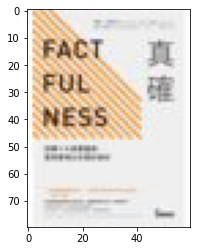

In [58]:
isbn = 9789861343242
# 9789861850719
url = 'http://static.findbook.tw/image/book/{}/medium'.format(isbn)
r = requests.get(url = url)
im = Image.open(BytesIO(r.content))

plt.imshow(im)
plt.show()

In [3]:
import urllib


In [4]:
im_url = "http://static.findbook.tw/image/book/{}/medium".format(isbn)
print(im_url)

NameError: name 'isbn' is not defined

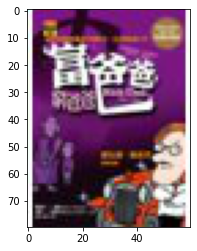

In [27]:
im = Image.open(requests.get(im_url, stream=True).raw)

plt.imshow(im)
plt.show()

# GOOGLE BOOK API

In [82]:

# isbn = 9781292018195
# isbn = 1292018194
# isbn = 9789863984412
# isbn = 9789866281860
isbn = 9789861343242
# isbn = 23135165



In [4]:
search = 'zero to one'
# search = 9789861343242


In [5]:
# search.replace(' ','+')
isinstance(search, int)

False

In [6]:
if isinstance(search, int):
    search_url = 'https://www.googleapis.com/books/v1/volumes?q=isbn:{}'.format(search)
else:
    search_url = "https://www.googleapis.com/books/v1/volumes?q={}".format(search.replace(' ','+'))
r = requests.get(url = search_url)

print(r)
# print(r.text)



<Response [200]>


In [7]:
results = json.loads(r.text)

In [11]:
pprint(results)

{'items': [{'accessInfo': {'accessViewStatus': 'SAMPLE',
                           'country': 'TW',
                           'embeddable': True,
                           'epub': {'acsTokenLink': 'http://books.google.com.tw/books/download/Zero_to_One-sample-epub.acsm?id=ZH4oAwAAQBAJ&format=epub&output=acs4_fulfillment_token&dl_type=sample&source=gbs_api',
                                    'isAvailable': True},
                           'pdf': {'isAvailable': False},
                           'publicDomain': False,
                           'quoteSharingAllowed': False,
                           'textToSpeechPermission': 'ALLOWED_FOR_ACCESSIBILITY',
                           'viewability': 'PARTIAL',
                           'webReaderLink': 'http://play.google.com/books/reader?id=ZH4oAwAAQBAJ&hl=&printsec=frontcover&source=gbs_api'},
            'etag': 'IbryySg014k',
            'id': 'ZH4oAwAAQBAJ',
            'kind': 'books#volume',
            'saleInfo': {'buyLink': 

In [88]:
# result['items'][0]['volumeInfo']

In [9]:
from pprint import pprint

In [122]:
# print(len(result['items']))
len(results['items'])
# pprint(result)

1

In [123]:
books_list = []
for item in results['items']:
    if 'volumeInfo' not in item:
        print(item)
        continue
    item_info = item['volumeInfo']
    # Parsing
    if 'categories' in item_info:
        categories = item_info['categories']
    else:
        categories = ""

    if 'title' in item_info:
        title = item_info['title']
        if 'subtitle' in item_info:
            title += ' '+ item_info['subtitle']
    else:
        title = ""

    if 'publishedDate' in item_info:
        published_date = item_info['publishedDate']
    else:
        published_date = ""

    if 'imageLinks' in item_info:
        img_link = item_info['imageLinks']['thumbnail']
    else:
        img_link = ""

    if 'industryIdentifiers' in item_info:
        identifier = item_info['industryIdentifiers']
    else:
        identifier = ''

    if "canonicalVolumeLink" in item_info:
        purshase_link = item_info["canonicalVolumeLink"]
    else:
        purshase_link = ''

    obj = {
        "categories" : categories,
        "title": title,
        "published_date" : published_date,
        "img_link": img_link,
        "identifier": identifier,
        "purshase_link": purshase_link
    }
    books_list.append(obj)

In [124]:
books_list

[{'categories': ['Business & Economics'],
  'title': '真確 扭轉十大直覺偏誤，發現事情比你想的美好',
  'published_date': '2018-07-01',
  'img_link': 'http://books.google.com/books/content?id=iCNiDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api',
  'identifier': [{'type': 'ISBN_13', 'identifier': '9789861343242'},
   {'type': 'ISBN_10', 'identifier': '9861343245'}],
  'purshase_link': 'https://play.google.com/store/books/details?id=iCNiDwAAQBAJ'}]

In [116]:
categories = result['items'][0]['volumeInfo']['categories']
categories

['Business & Economics']

In [47]:
result['items'][0]['volumeInfo']['title']
result['items'][0]['volumeInfo']['subtitle']
title = result['items'][0]['volumeInfo']['title'] +' '+ result['items'][0]['volumeInfo']['subtitle']
title

'真確 扭轉十大直覺偏誤，發現事情比你想的美好'

In [48]:
author = result['items'][0]['volumeInfo']['authors']
author

['漢斯．羅斯林', '奧拉．羅斯林', '安娜．羅朗德']

In [49]:
published_date = result['items'][0]['volumeInfo']['publishedDate']
published_date


'2018-07-01'

In [50]:
result['items'][0]['volumeInfo']

{'title': '真確',
 'subtitle': '扭轉十大直覺偏誤，發現事情比你想的美好',
 'authors': ['漢斯．羅斯林', '奧拉．羅斯林', '安娜．羅朗德'],
 'publisher': '先覺',
 'publishedDate': '2018-07-01',
 'description': '★榮獲誠品選書．博客來選書．金石堂選書一致推薦 比爾．蓋茲2018年度選書，空前推薦 「我所讀過最重要的書之一，帶領你清晰思考世界的必備指南。」──比爾．蓋茲 ★出版即登上各國暢銷榜，Amazon非文學類書籍第１名 ★十度登上TED大會演說，知名公共教育家漢斯．羅斯林的唯一著作 ★一本讓比爾蓋茲從此不再使用「開發中國家」名詞的書，空前推薦贈送給全美大學生的畢業禮物 ★嚴長壽、謝金河、王文靜、劉軒、葉丙成、馮勃翰、林明仁、許毓仁 熱情推薦 ★榮獲誠品選書．博客來選書．金石堂選書一致推薦 「我窮盡畢生之力抵抗全球的無知，傳播基於事實的世界觀。 這本書是我的最後一役，是我設法影響世界的最後努力。」──漢斯．羅斯林 有些事儘管牴觸我們的直覺認知，儘管顯得絕無可能，卻仍然真確。 這本書在談世界，在談世界真正的樣子， 也是在談你，以及你該如何真確思考，基於事實行動。 我們總希望可以客觀看待事情，針對世界現狀的簡單問題，例如「全球有多少人口享有電力」「有多少一歲孩童接種疫苗」「有多少比例的女孩讀完小學」，也希望能提出正確的觀察。但事實上，我們一再地給出錯誤的結論，而且錯得離譜，連隨機亂答的黑猩猩，正確率都贏過老師、記者、投資銀行家和諾貝爾獎得主。這到底是怎麼一回事？ 在這本書裡，全球公衛教授和公共教育家漢斯．羅斯林，提出為什麼會發生這種事的新解釋──原來問題在於人們對自己的無知毫無頭緒，我們的思考往往受到不自覺且可預期的直覺偏誤所影響。 漢斯致力運用活潑的數據實證，改變人們的思維方式。他舉出十個扭曲認知的直覺，如何造成我們誤解身處的世界，例如：我們有傾向把世界分成兩個陣營的「二分化直覺」（通常是某種版本的「我們」和「他們」），我們吸收訊息的方式深受「恐懼型直覺」主宰（災害新聞空前常見，偏偏世界空前安全）、對於進步的認知容易受「負面型直覺」牽引（相信多數事情正變得更糟，忽視逐漸的進步），並提出一個個明確可執行的思考工具，告訴大家如何扭轉根深柢固的偏見。 這是

In [51]:
if 'imageLinks' in result['items'][0]['volumeInfo']:
    img_link = result['items'][0]['volumeInfo']['imageLinks']['thumbnail']
else:
    img_link = ""

In [52]:
img_link

'http://books.google.com/books/content?id=iCNiDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'

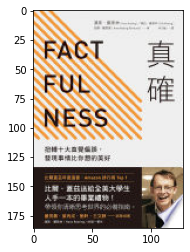

In [53]:
im = Image.open(requests.get(img_link, stream=True).raw)

plt.imshow(im)
plt.show()